# Data Analysis with Pandas

## Jupyter

> [...] is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: **data cleaning** and transformation, numerical simulation, statistical modeling, **data visualization**, machine learning, and much more.

👉 [Jupyter.org](https://jupyter.org/)

Open your terminal:

```
cd ~/some/where
jupyter notebook
````

Let's have a *quick tour*!

## Pandas Introduction

> [...] is an open source library providing high-performance easy-to-use data structures and data analysis tools for Python.

👉 [Pandas.pydata.org](https://pandas.pydata.org/)

👉 [Pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) to print/bookmark

### pandas Series

* Pandas 1-dimensional array
* with an additional index
* with support for multiple data types

👉 [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [2]:
import pandas as pd

s = pd.Series(data=[1,2,'three'], index=['id1', 'id2', 'id3'])
s = pd.Series({'id1': 1, 'id2': 2, 'id3': 'three'})
s

id1        1
id2        2
id3    three
dtype: object

### pandas DataFrames

Pandas 2-dimensional table:
* with labels on both axes (row and columns)
* with multiple data types

👉 [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

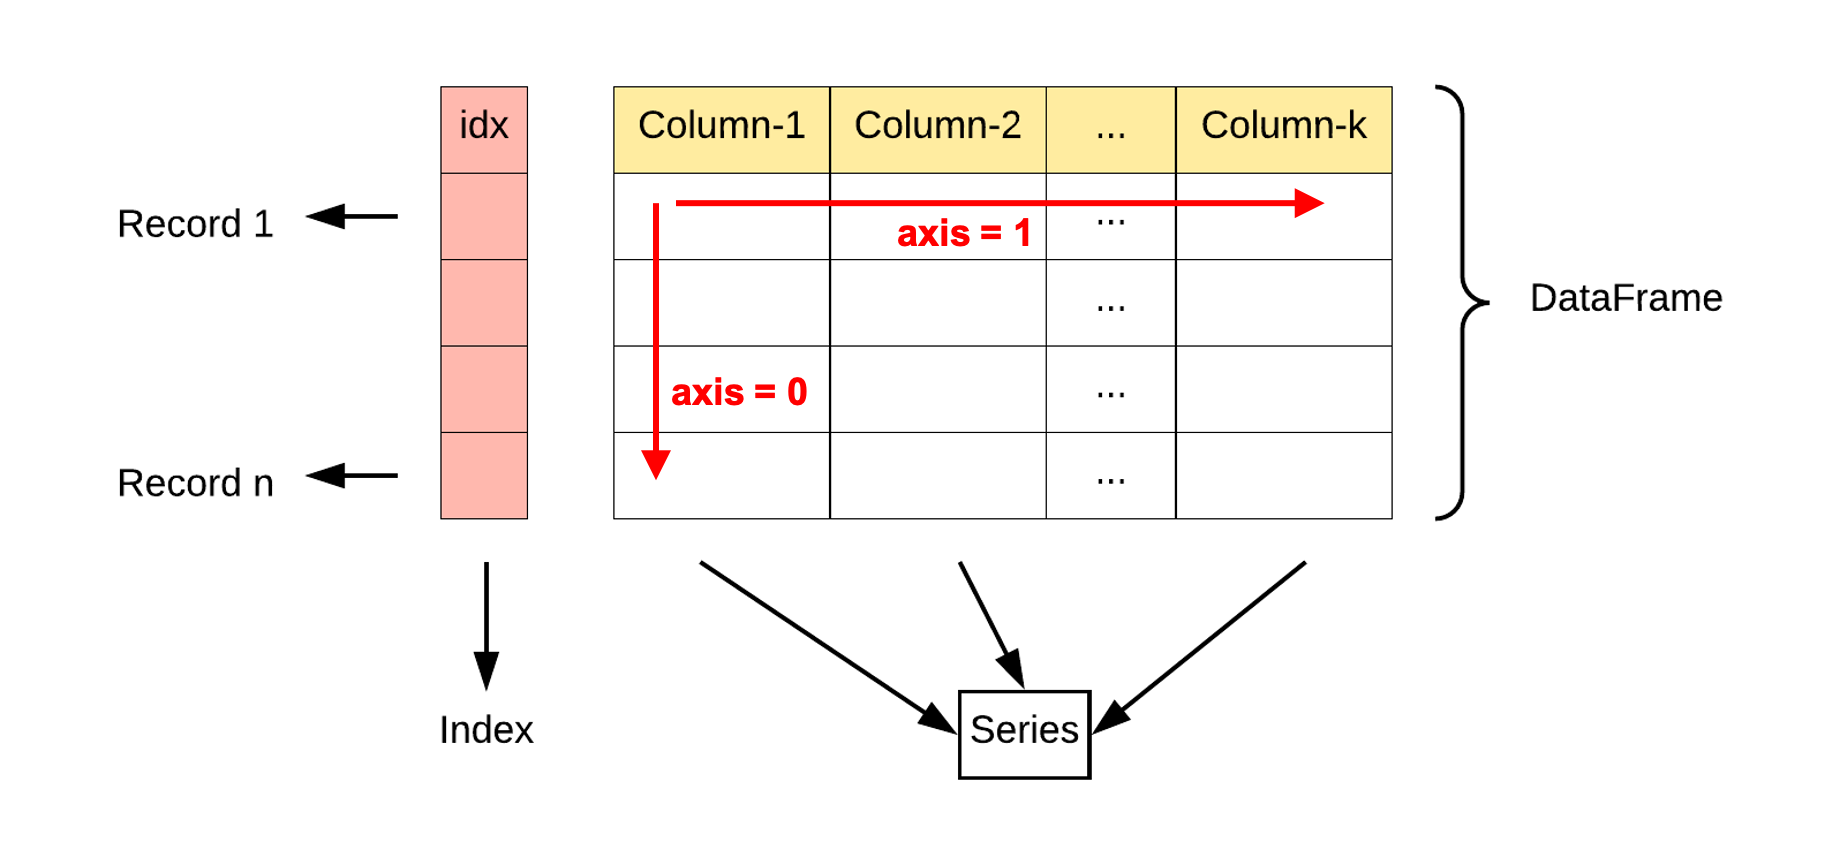

In [3]:
import pandas as pd

df = pd.DataFrame(
    [[4, 7, 10],
     [5, 8, 11],
     [6, 9, 12]],
    index=['row_1', 'row_2', 'row_3'],
    columns=["col_a", "col_b", "col_c"]
)
df

col_a  col_b  col_c
row_1      4      7     10
row_2      5      8     11
row_3      6      9     12

### DataFrames are a dictionary of Series



In [4]:
apples  = pd.Series(data=[1, 2, 3], index=["id1", "id2", "id3"])
oranges = pd.Series(data=[4, 5, 6], index=["id1", "id2", "id3"])
d = {
    "apples": apples,
    "oranges": oranges,
}
pd.DataFrame(d)

apples  oranges
id1       1        4
id2       2        5
id3       3        6

## Exploratory Data Analysis

Starting a new notebook to explore a dataset: [Countries of the World](https://www.kaggle.com/fernandol/countries-of-the-world).

You can have a look at it [in this gist](https://gist.github.com/ssaunier/fcf6e1c9485f2d64607a093795372339) and download it with:

```
curl -s -L https://lew.ag/countries-dataset > countries.csv
head -n 3 countries.csv
```

This is how all Notebooks always start:

In [5]:
import numpy as np
import pandas as pd

### Notebook Super Powers

In a new cell:

```
pd.read<TAB>
pd.read_csv<SHIFT+TAB>  # (once, twice, three times or four times)
```

Go ahead and load the CSV into a `countries_df` DataFrame:

In [ ]:
file = "countries.csv"  # Path relative to your notebook
countries_df = pd.read_csv(file, decimal=",")

### Get a quick sense of the data

Here are some utility methods to call on a fresh `DataFrame`:

In [ ]:
countries_df.shape  # => Tuple representing the dimensionality of the DataFrame

Replace `.shape` with:

* [`pandas.DataFrame.dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)
* [`pandas.DataFrame.info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
* [`pandas.DataFrame.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

You can also do:

In [ ]:
countries_df.isnull().sum()

### Get a quick look

In [ ]:
countries_df.head()
countries_df.tail()

### Same logic as SQL

You can manipulate a DataFrame the same way you query a relational database table.

👉 [Pandas Doc: Comparaison with SQL](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html)

### Reading column(s)

Use the `[]` syntax to get one or many columns:

```
countries_df["Country"]
type(countries_df["Country"])  # => pandas.core.series.Series
```

```
countries_df[["Country", "Region"]]
type(countries_df[["Country"]])  # => pandas.core.frame.DataFrame
```

### Group of rows/columns

```
countries_df.loc[0:5, ["Country", "Region"]]  # From row index 0 to 5 (included)
```

👉 Read [this Stackoverflow Q&A thread](https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte/48411543#48411543)

## Pandas - Boolean indexing

🤔 What are the countries with **more than one billion** inhabitants?

Pure Python naive implementation:

```
big_countries = []
for index, country in countries_df.iterrows():
    if country["Population"] >= 1_000_000_000:
        big_countries.append(country)
pd.DataFrame(big_countries)
```

This is a **one-liner** with **Boolean Indexing**:

```
countries_df[countries_df["Population"] >= 1_000_000_000]
```

🤔 What are the countries of the **American** continent?

```
american = countries_df["Region"].str.contains("AMER")
countries_df[american]
```

🤔 What are the countries of **Europe**?

We can use [`pandas.Series.isin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html#pandas.Series.isin)

```
countries_df[countries_df["Region"].isin(["WESTERN EUROPE", "EASTERN EUROPE"])]
```

What happened?

```
countries_df["Region"].unique()
```

We need to **cleanup** first:

```
countries_df["Region"] = countries_df["Region"].str.strip()
```

If we want to answer the **inverse** question, we can use the bitwise oeprator `~`:

```
countries_df[~countries_df["Region"].isin(["WESTERN EUROPE", "EASTERN EUROPE"])]
```

## Pandas - Re-indexing

```
countries_df["Country"] = countries_df["Country"].map(str.strip)
countries_df.set_index("Country", inplace=True)
```

The index is no longer `0`, `1`, etc. but it's the country names!

We now can do something like this:

```
countries_df.loc["France":"Germany", ["Region", "Population"]]
```

## Pandas - Sorting

We can sort on index with [`pandas.DataFrame.sort_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html):

```
countries_df.sort_index(ascending=False)
```

We can sort on columns with [`pandas.DataFrame.sort_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html):

```
countries_df.sort_values(by="Population", ascending=False)
```

```
countries_df.sort_values(by="GDP ($ per capita)", na_position="first")
```

## Pandas - Grouping

Very close to [`GROUP BY` in SQL](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html#group-by"). It's a 3-step process:

1. **Split**: a DataFrame is split into groups depending on keys
2. **Apply**: an **aggregation** function (`sum`, `mean`, etc.) is applied on each group
3. **Combine**: result from the previous operations are merged (i.e. reduced) into one new DataFrame
```

🤔 Which region of the world is the most populated?

```
regions = countries_df.groupby("Region")
```

```
regions[["Population", "Area (sq. mi.)"]].sum()
```

```
regions[["Population", "Area (sq. mi.)"]].sum() \
    .sort_values("Population", ascending=False)
```

## One more thing...

### Plotting

```
%matplotlib inline
import matplotlib
```

```
gdp = "GDP ($ per capita)"
top_ten_countries_df = countries_df[[gdp]] \
    .sort_values(gdp, ascending=False) \
    .head(10)

top_ten_countries_df
```

```
top_ten_countries_df.plot(kind="bar")
```

## Your turn!